In [ ]:
#hide
from pyanomaly.stats import *
from pyanomaly.timeseries import twitter

# pyanomaly

> Conjunto de algoritmos para detectar anomalias em Series Temporais.

    Zscore Robusto
    Tukey
    Twitter S-MAD

## Instalação

pip install pyanomaly

## Como usar

Iremos realizar os testes no dataset contendo temperaturas diarias da cidade de Melbourne.

dataset: https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

In [ ]:
# data
import numpy as np
import pandas as pd
# plot
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df = pd.read_csv('./dados/daily-min-temperatures.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

In [ ]:
print(df.head(5).T)

Date  1981-01-01  1981-01-02  1981-01-03  1981-01-04  1981-01-05
Temp        20.7        17.9        18.8        14.6        15.8


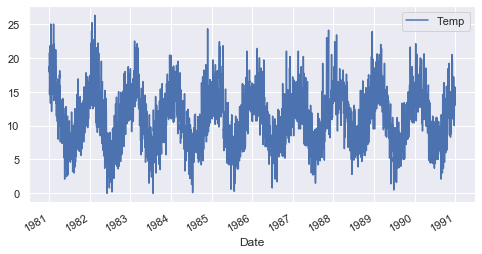

In [ ]:
df.plot(figsize=(8, 4));

## Mad

In [ ]:
mad = MAD()
mad.fit(df['Temp'])
outliers = mad.fit_predict(df['Temp'])

outliers.head()

Date
1981-01-15    25.0
1981-01-18    24.8
1981-02-09    25.0
1982-01-17    24.0
1982-01-20    25.2
Name: Temp, dtype: float64

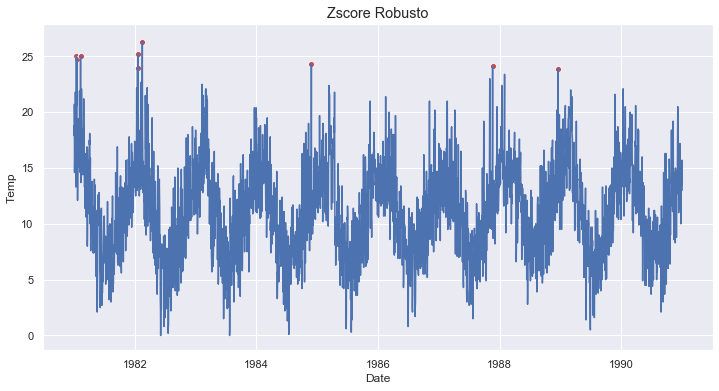

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
                       
sns.lineplot(x=df.index, y=df['Temp'], ax=ax)
sns.scatterplot(x=outliers.index, y=outliers, 
                color='r', ax=ax)

plt.title('Zscore Robusto', fontsize='large');

## Tukey

In [ ]:
tu = Tukey()

tu.fit(df['Temp'])
outliers = tu.predict(df['Temp'])

outliers.head()

Date
1981-01-15    25.0
1981-01-18    24.8
1981-02-09    25.0
1982-01-17    24.0
1982-01-20    25.2
Name: Temp, dtype: float64

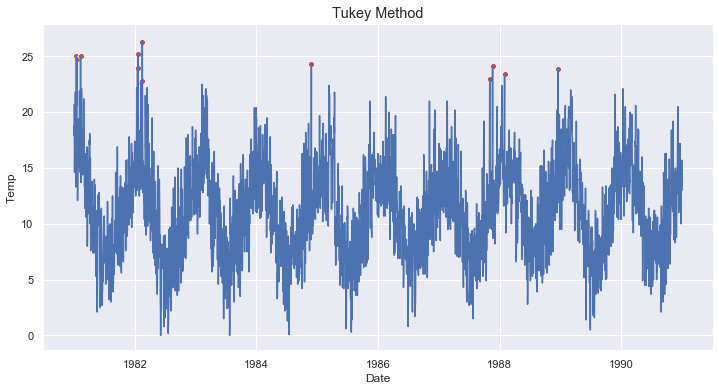

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
                       
sns.lineplot(x=df.index, y=df['Temp'], ax=ax)
sns.scatterplot(x=outliers.index, y=outliers, 
                color='r', ax=ax)

plt.title('Tukey Method', fontsize='large');

## Twitter - S-MAD

In [ ]:
outliers = twitter(df['Temp'], period=12)
outliers.head()

Date
1981-01-15    25.0
1981-01-18    24.8
1981-02-09    25.0
1982-01-20    25.2
1982-02-15    26.3
Name: Temp, dtype: float64

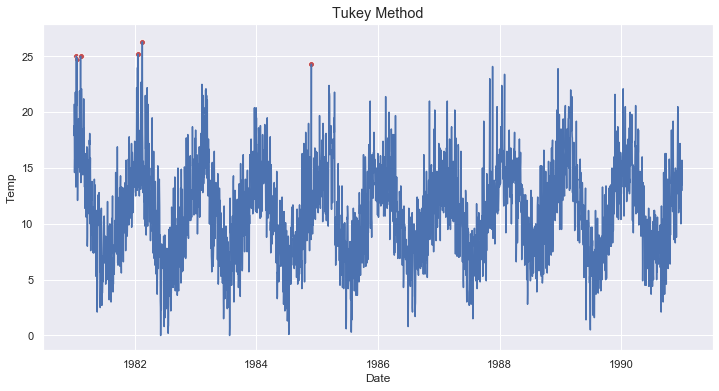

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
                       
sns.lineplot(x=df.index, y=df['Temp'], ax=ax)
sns.scatterplot(x=outliers.index, y=outliers, 
                color='r', ax=ax)

plt.title('Tukey Method', fontsize='large');